              precision    recall  f1-score   support

           0       0.84      0.52      0.64       274
           1       0.12      0.39      0.18        46

    accuracy                           0.50       320
   macro avg       0.48      0.45      0.41       320
weighted avg       0.73      0.50      0.57       320



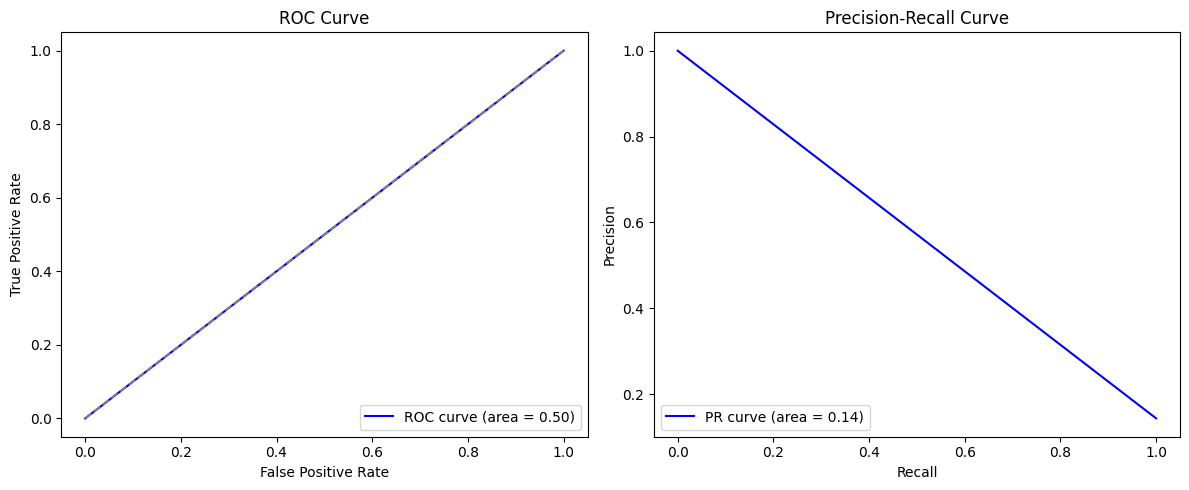

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('training.csv')

# 1. Handle Target Variable Encoding
df['increase_stock'] = df['increase_stock'].map({'low_bike_demand': 0, 'high_bike_demand': 1})

# 2. Cyclic Encoding for 'hour_of_day', 'day_of_week', and 'month'
df['hour_sin'] = np.sin(2 * np.pi * df['hour_of_day'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour_of_day'] / 24)
df['day_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# 3. Split the data into training and testing sets
X = df.drop('increase_stock', axis=1)  # Features
y = df['increase_stock']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# 4. Naive Classifier (Dummy Classifier) that randomly assigns to high or low demand
naive_clf = DummyClassifier(strategy="uniform", random_state=32)
naive_clf.fit(X_train, y_train)

# 5. Make Predictions
y_pred = naive_clf.predict(X_test)

# 6. Classification Report
print(classification_report(y_test, y_pred))

# 7. ROC Curve
fpr, tpr, _ = roc_curve(y_test, naive_clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# 8. PR Curve
precision, recall, _ = precision_recall_curve(y_test, naive_clf.predict_proba(X_test)[:, 1])
pr_auc = average_precision_score(y_test, naive_clf.predict_proba(X_test)[:, 1])

# 9. Plot ROC and PR Curves
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='b', label=f'PR curve (area = {pr_auc:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()
